<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение в биологии

### Лекция 2: Основные понятия и простейшие модели машинного обучения

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

## Обучение модели

**Как вы думаете, что значит фраза "обучить модель"?**

![ml1_stonks.jpg](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/ml1_stonks.jpg)

**Обучение** для модели - это итеративное улучшение описания данных моделью с помощью изменения ее параметров.

Например, для простой линейной регрессионной модели обучение будет выглядеть как-то так:

![training_gif.gif](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/training_gif.gif)

Сколько здесь параметров и как эти параметры меняются?

Фактически при обучении происходит **"подгон" параметров** вашей модели таким образом, чтобы данные **как можно лучше были описаны** этой моделью. Подгоном это можно назвать потому, что мы формулируем гипотезу после того, как видим данные, а не заранее.

*Получается, машинное обучение - это профессиональный уровень подгона моделей?*

Это не совсем так. Давайте рассмотрим эту проблему на примере самой простой модели.

## Самая простая модель классификации

**Как вы думаете, как устроена самая простая модель для задачи классификации?**

Представим, что в исходных данных у нас есть несколько размеченных образцов (будем дальше называть их **точками**). Будем считать признаки точки ее координатами в пространстве.

Тогда самый простой* способ предсказывать класс точки - это **искать ближайшую точку и выдавать ее класс в качестве предсказания**.

Немного более общий способ называется **k-NN** (метод k ближайших соседей, k nearest neighbours).

В этом случае находится **k ближайших известных точек** к той, которую мы хотим классифицировать, и предсказывается **тот класс, которого больше** среди "соседей".

![knn_ex.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_ex.png)

### Попробуем обучить классификатор k-NN

In [ ]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
knn.predict(X)[:30]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

Последние два вектора похожи, но хочется это как-то **измерить количественно**. Каким образом можно это сделать?

Для этого существует множество различных метрик качества. Мы вернемся к этому позднее.

### Плюсы и минусы k-NN

**Плюсы**:
* Простота реализации
* Дает хорошую интуицию о поведении почти всех моделей машинного обучения

**Минусы**:
* Длительное время предсказания (особенно для больших выборок)
* Трудность в интерпретации предсказания
* Необходима предобработка признаков

### Предобработка признаков

**Иногда признаки не сравнимы между собой** или вообще измеряются в разных величинах. Масштаб признаков непосредственно влияет на определение расстояния между объектами.

![scaling.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/scaling.png)

### Сложность модели k-NN

**Что такое "сложность" модели?**

Этот вопрос выглядит очень простым, но ответ на него довольно непрост.

В общем смысле, под "сложностью" в этом курсе мы будем понимать вовсе не то, насколько сложный алгоритм лежит в основе модели, а то, **насколько большое количество информации о закономерностях в данных способна выявить модель в процессе обучения**.

Количество информации, хранящейся в обученной модели, можно считать соразмерным тому, насколько точно мы можем восстановить информацию об использованных для обучения данных.

Очень близкое понятие - это "емкость" модели (model capacity). Обычно они взаимоменяемы.

**Имея в виду такое определение "сложности", какие модели k-NN являются более сложными?**

Модель сложнее при высоких k или при низких?

![knn_complexity.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_complexity.png)

Как мы видим, границы между классами по версии модели с низкими k оказываются **очень рваными** и не всегда соответствующими действительности.

В то же время, при очень высоких k мы наблюдаем **чрезмерно простую границу**.

**Какой будет результат, если взять число соседей, равное размеру выборки?**

**Какой вывод мы можем сделать?**

* Слишком простая модель не способна описать данные хорошо. Она выявляет только **очень базовые закономерности**.
* Слишком сложная модель начинает описывать **шум, который присутствует в данных**.
* Для адекватного предсказания нужно брать модель **и не слишком сложную, и не слишком простую**.

![model_complexity.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/model_complexity.png)

## Недообучение и переобучение

Как мы заметили, при усложнении модели ее **описание входных данных становится более и более точным, в какой-то момент становясь неадекватно точным**. Так происходит не только с моделью k-NN. Давайте рассмотрим пример аппрокисмации полиномом (полиномиальная регрессия):

![overfitting.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/overfitting.png)

Как мы видим, при степени k = 1 модель недостаточно сложна, чтобы уловить зависимости в данных, а при степени k = 17 модель описывает все: и шум, и данные, и поэтому хуже описывает исходную функцию.

Эти явления называют **недообучением** и **переобучением** модели.

**Недообучение модели** возникает, когда модели не хватает сложности для того, чтобы выучить взаимосвязь, лежащую в основе данных.

**Переобучение модели** возникает, когда модель хорошо описывает не только сами данные, но и шум в этих данных.

Предположим, что мы можем количественно измерять качество предсказаний модели k-NN. Давайте оценим, насколько хорошо полученная модель опишет те же данные, которые использовались для ее обучения.

**Как вы думаете, для какого k качество было бы наилучшим?**

Для k = 1. Это так, потому что при предсказании используется **точка, наиболее близкая к определяемой**, то есть **она сама**. Очевидно, предсказываемый класс будет всегда совпадать.

![knn_k1.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_k1.png)

![knn_quality.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_quality.png)

Это как раз тот случай "идеального подгона" - мы подогнали нашу модель так, что она идеально описывает входные данные. Но задача машинного обучения вовсе не в этом...

...ведь тогда непобедимым бейзлайном является обычный словарь :^)

### Задача обучения с учителем

Задача машинного обучения - создать такую модель, которая будет **хорошо описывать новые данные**, которые модель не "видела".

**Как вы думаете, каким способом нужно оценивать качество модели?**

Классический способ: **до обучения модели выборка разбивается на 2 части**: одна из них называется **тренировочной** (train), а другая - **тестовой** (test).

**В какой пропорции разбивают на train/test?**

На самом деле, это достаточно творческий вопрос, и ответ на него в первую очередь **зависит от объема и природы ваших данных**. Иногда для теста достаточно 1% информации, а иногда нужно положить туда добрую половину.

Обычно берут **70-80% для обучения** и **20-30% для теста** модели, но это не жесткое правило.

![train-test.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/train-test.png)

#### Зависимость качества от сложности модели

Если оценим качество модели k-NN в зависимости от числа соседей k на train и test, то получим такую картину:

![knn_quality_test.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_quality_test.png)

Как мы видим, при k $\approx$ 30 качество на test перестает расти с увеличением сложности модели. При дальнейшем увеличении сложности качество на test падает.

Когда с увеличением сложности модели вы наблюдаете **увеличение качества модели на train** и **уменьшение качества на test**, происходит переобучение.

![knn_quality_test.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/knn_quality_test.png)

#### Зависимость качества от соотношения train/test

Качество также зависит от соотношения train/test.

![train-test-split.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/train-test-split.png)

Для того чтобы посмотреть, как это все работает, нужно познакомиться с разными **метриками качества**.

## Оценка качества модели в задаче классификации

Хорошо бы иметь возможность количественно **оценить, насколько хорошо обученная модель описывает данные**. Для этого используют несколько разных метрик качества.

Для разных задач обучения с учителем (supervised) используются различные метрики. Мы разберем, какие метрики используются для задачи классификации и задачи регрессии.

Для каждой метрики мы попытаемся сформулировать т.н. **baseline** - качество, которое достигается либо случайным предсказателем, либо очень простой моделью.

Перед тем, как пытаться оценить качество модели классификации, мы:
1. Составим тренировочную и тестовую выборки.
2. Обучим модель на тренировочной выборке.
3. Получим вектор предсказаний модели для тестовой выборки.

**Разбиение на train/test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=777)

In [ ]:
print(f"Train size = {y_train.shape}")
print(f"Test size = {y_test.shape}")

Train size = (398,)
Test size = (171,)


**Обучение модели на train**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

**Получение предсказаний для test**

In [ ]:
y_test_pred = knn.predict(X_test)

**Получение предсказаний для train**

(в педагогических целях)

In [ ]:
y_train_pred = knn.predict(X_train)

### Метрика Accuracy (точность v1.0)

*Однажды Сталин беседовал с метеорологами. Он сам в юности работал наблюдателем-метеорологом в Тифлисской физической обсерватории.*

*— Какая у вас точность прогнозов? — спросил Сталин.*

*— Сорок процентов, товарищ Сталин, — сокрушённо ответили метеорологи. — Современными приборами трудно достичь большей точности.*

*— А вы говорите наоборот, — предложил Сталин, — и тогда у вас будет шестьдесят процентов!*

**Accuracy** (точность) - метрика качества, равная доле правильно классифицированных образцов.

$$accuracy = \dfrac{N_{correct}}{N}$$

In [ ]:
from sklearn.metrics import accuracy_score

Качество на train:

In [ ]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9221105527638191

Качество на test:

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9181286549707602

Как мы видим, **качество на train выше, чем качество на test**.

Метрика accuracy **очень простая** и ее можно посчитать **для любого числа классов** (дальше мы будем рассматривать метрики для *бинарной* классификации).

Однако в ее простоте заключается ее большой недостаток: accuracy не способна показать, в объектах какого класса мы ошибаемся чаще.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

accuracy_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.951

Классификатор предсказывает нули почти вседа. По сути он бесполезен, но его метрика accuracy высокая.

В scikit-learn есть т.н. Dummy-классификаторы, которыми удобно пользоваться для оценки качества бейзлайна.

Следовательно, **baseline для метрики accuracy - это наибольшая из долей классов**.

Например, если класса 3, и их доли равны 20%, 30% и 50%, то baseline = 0.5.

**Почему так?**

Модель, которая независимо от входных данных предсказывает наибольший класс (фактически предсказывая среднее) будет иметь такое качество.

### Метрики качества бинарной классификации

При бинарной классификации обычно **выделяют "положительный"** (positive) **и "отрицательный"** (negative) **классы**.

![tp_fp_tn_fn.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/tp_fp_tn_fn.png)

*Источник: [Wikipedia Commons](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#/media/File:Sensitivity_and_specificity_1.01.svg)*

**TP, FP, TN и FN** - это количества образцов в каждой из групп.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[ 44,  13],
       [  1, 113]], dtype=int64)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

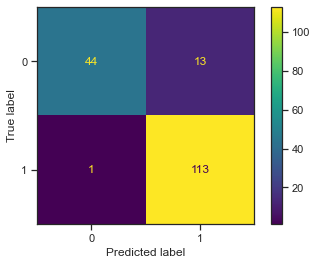

In [ ]:
plot_confusion_matrix(estimator=knn, X=X_test, y_true=y_test)

Сами по себе TP, FP, TN, FN говорят не очень многое, но **они могут быть использованы в комбинации**, и из них получают множество других метрик.

### Метрика precision (точность v2.0)

Да, по-русски она тоже называется "точность". Эта метрика отражает, **сколько положительных предсказаний были правильными**.

$$precision = \dfrac{TP}{TP + FP}$$

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_true=y_train, y_pred=y_train_pred)

0.9108527131782945

In [ ]:
precision_score(y_true=y_test, y_pred=y_test_pred)

0.8968253968253969

Если положительный класс предсказывается очень редко, то метрика становится неинформативна.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

precision_score(y_true=dummy_y, y_pred=dummy_y_pred)

1.0

### Метрика recall (sensitivity, чувствительность)

Эта метрика показывает, **сколько положительных образцов были определены правильно**.

$$recall = \dfrac{TP}{TP + FN}$$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_true=y_train, y_pred=y_train_pred)

0.9670781893004116

In [ ]:
recall_score(y_true=y_test, y_pred=y_test_pred)

0.9912280701754386

Если положительный класс предсказывается очень редко, то метрика это хорошо иллюстрирует.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.02

...зато наоборот - плохо.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.98

### Метрика specificity (специфичность)

Эта метрика показывает, **сколько отрицательных образцов были определены правильно**.

$$specificity = \dfrac{TN}{TN + FP}$$

Фактически это **recall для негативного класса**.

In [ ]:
from sklearn.metrics import specificity_score

ImportError: cannot import name 'specificity_score' from 'sklearn.metrics' (C:\Users\arsen_z\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

В scikit-learn нет функции для расчета этой метрики.

Как мы видим, перечисленные метрики (precision, recall, specificity) пользуются только частью матрицы ошибок. Следующие метрики пытаются исправить этот недостаток.

### F1-score

Метрика F1 - это **среднее гармоническое precision и recall**.

$$F1 = \dfrac{2}{\dfrac{1}{recall} + \dfrac{1}{precision}}$$

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true=y_train, y_pred=y_train_pred)

0.93812375249501

In [ ]:
f1_score(y_true=y_test, y_pred=y_test_pred)

0.9416666666666667

В обоих вырожденных случаях предсказания F1 ловит проблему (дает низкое качество).

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.0392156862745098

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.09342230695900858

### Метрика MCC (корреляция Мэтьюса)

Метрика MCC (Matthews correlation coefficient) - это **коэффициент корреляции для бинарных величин**.

В начале 2020 года вышла [статья](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7), где предлагается использовать для оценки качества классификатора корреляцию Мэтьюса.

Авторы утверждают, что она работает лучше, чем  F1-score.

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
matthews_corrcoef(y_true=y_train, y_pred=y_train_pred)

0.8360171378255667

In [ ]:
matthews_corrcoef(y_true=y_test, y_pred=y_test_pred)

0.816982446237566

Замечательно то, что MCC симметричен относительно класса.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

matthews_corrcoef(y_true=dummy_y, y_pred=dummy_y_pred)

0.13790945949795835

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

matthews_corrcoef(y_true=dummy_y, y_pred=dummy_y_pred)

-0.13790945949795835

### Интегральные метрики качества

Большинство бинарных классификаторов обычно предсказывает не точный класс (0/1), а **вероятность того, что наблюдаемый объект относится к положительному классу** (с точки зрения классификатора).

In [ ]:
y_train_proba = knn.predict_proba(X_train)[:,1]

In [ ]:
y_test_proba = knn.predict_proba(X_test)[:,1]

Когда мы получаем предсказание-вероятность, то качество такого классификатора можно оценить с помощью **установления различных отсечек по вероятности**.

Инегральные метрики качества способны **агрегировать информацию** из всего множества **различных таблиц ошибок**, полученных с разными отсечками.

#### ROC кривая, AUC ROC

ROС-кривая (receiver operating characteristic, рабочая характеристика приёмника) помогает **оценить качество бинарной классификации графически**. Для этого **для каждого возможного порога** (все вероятности выше порога принимаются за 1, а ниже - за 0) **измеряются метрики recall и specificity**, и **объединяются в кривую** по возрастанию порога.

![rocauc_expl.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/rocauc_expl.png)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
fpr_train, tpr_train, thres_train = roc_curve(y_true=y_train, y_score=y_train_proba)
fpr_test, tpr_test, thres_test = roc_curve(y_true=y_test, y_score=y_test_proba)

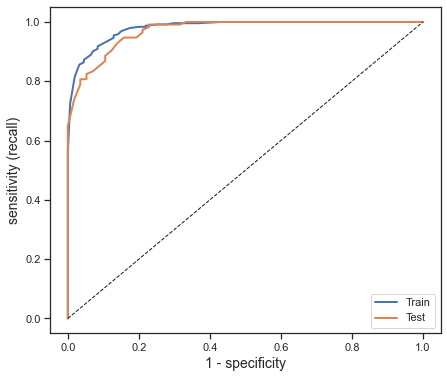

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label="Train", lw=2)
plt.plot(fpr_test, tpr_test, label="Test", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.ylabel("sensitivity (recall)", fontsize=14)
plt.xlabel("1 - specificity", fontsize=14)
plt.legend(); plt.show()

**Бейзлайн для ROC-кривой** - случайный классификатор. Он дает диагональную прямую, идущую от точки (0, 0) до точки (1, 1).

Почему\*\*\*? Можно объяснить так: $recall$ и $specificity$ - это, соответственно, доли правильно определенных положительных и отрицательных образцов при выбранном пороге. При уменьшении порога мы переносим точки из класса $0$ в класс $1$. Тогда доля корректно определенных положительных образцов растет (исходно она равна $0$), а доля корректно определенных отрицательных образцов падает (исходно она равна $1$; $1 - specificty = 0$). Предположим, величина выборки равна $N$, а доля положительного класса под порогом равна $p$. Если ранжирование классификатора случайно, то мы ожидаем, что каждая следующая точка или увеличит recall, или уменьшит specificity. В среднем $recall$ увеличится на $\frac{p}{N}$, а $specificity$ уменьшится на $\frac{1 - p}{N}$. В результате в среднем мы будем оставаться около прямой $recall = 1 - specificity$.

В качестве метрики обычно используют **ROC AUC - площадь под ROC-кривой**.

**Для любопытных**: Классическая интерпретация ROC AUC определяет ее как вероятность, что **случайно взятый объект положительного класса имеет оценку принадлежности к этому классу выше, чем случайно взятый объект отрицательного класса**.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_true=y_train, y_score=y_train_proba)

0.9801407141908933

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_test_proba)

0.9706063404124345

**Бейзлайн для AUC ROC**, очевидно, равен 0.5.

#### PR-кривая, AUC PR

PR-кривая строится аналогично ROC-кривой, но в качестве метрик при разделении для каждого порога используются precision и recall.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision_train, recall_train, thres_train = precision_recall_curve(
    y_true=y_train,
    probas_pred=y_train_proba
)
precision_test, recall_test, thres_test = precision_recall_curve(
    y_true=y_test,
    probas_pred=y_test_proba
)

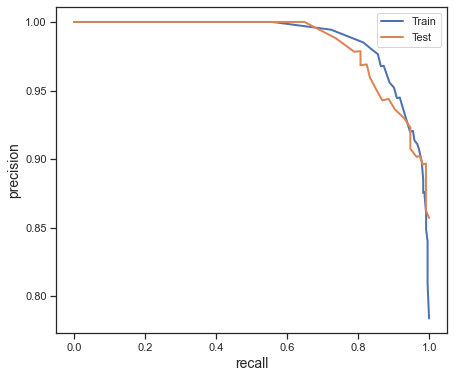

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(recall_train, precision_train, label="Train", lw=2)
plt.plot(recall_test, precision_test, label="Test", lw=2)
plt.ylabel("precision", fontsize=14)
plt.xlabel("recall", fontsize=14)
plt.legend(); plt.show()

Аналогично ROC AUC, в качестве метрики используется **PR AUC - площадь под PR-кривой**.

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
average_precision_score(y_true=y_train, y_score=y_train_proba)

0.985868982788476

In [ ]:
average_precision_score(y_true=y_test, y_score=y_test_proba)

0.9837427330163486

**Бейзлайн для AUC PR равен доле положительного класса в выборке**.

### Classification report

В sklearn есть замечательная возможность посмотреть быструю сводку различных метрик.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       155
           1       0.91      0.97      0.94       243

    accuracy                           0.92       398
   macro avg       0.93      0.91      0.92       398
weighted avg       0.92      0.92      0.92       398



In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        57
           1       0.90      0.99      0.94       114

    accuracy                           0.92       171
   macro avg       0.94      0.88      0.90       171
weighted avg       0.92      0.92      0.92       171



## Самая простая модель регрессии

**Как вы думаете, как устроена самая простая модель для задачи регрессии?**

На самом деле, мы можем использовать тот же принцип **k-NN**, но вместо того, чтобы предсказывать класс, нужно каким-то образом **агрегировать значения, полученные от k ближайших соседей**.

Чаще всего предсказывают **среднее по соседям** значение; чуть реже - **медиану**.

### Попробуем обучить регрессор k-NN

**Сразу разобьем данные на train и test**.

In [ ]:
import sklearn.datasets

In [ ]:
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

В этот раз произведем **стандартизацию признаков**.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Зачем это вообще нужно?**

Числовые признаки зачастую **не сравнимы между собой**, и один из признаков может изменяться в пределах тысяч и десятков тысяч (цена), а другой - в пределах единиц. Тогда первый признак будет **иметь значительно большее влияние на расстояние** между точками, практически **нивелируя влияние второго**. Чтобы этого избежать, **признаки можно стандартизовать**.

Теперь **обучим регрессионную модель**:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_train_pred = knn.predict(X_train)

In [ ]:
y_test_pred = knn.predict(X_test)
y_test_pred[:30]

array([18.98, 11.78, 12.46, 22.8 , 29.66, 18.34, 21.08, 33.32, 19.58,
       42.6 , 23.22, 23.32, 10.42, 20.94, 19.32, 33.06,  8.06, 24.3 ,
       24.22, 19.02, 17.04, 20.58, 11.58, 26.28, 17.66, 25.48, 25.78,
       29.18, 23.2 , 22.3 ])

In [ ]:
y_test[:30]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1])

Вроде бы снова похоже, но непонятно, как именно оценивать качество. Давайте сразу с этим разберемся.

## Оценка качества модели в задаче регрессии

Непосредственно **оценить качество регрессии сложнее**, чем качество классификации.

Самый простой способ - визуальный.

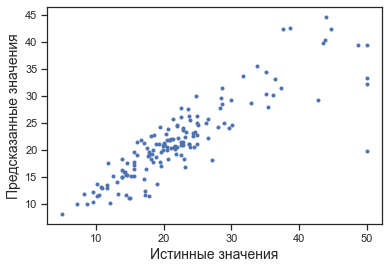

In [ ]:
plt.scatter(y_test, y_test_pred, marker=".")
plt.xlabel("Истинные значения", fontsize=14)
plt.ylabel("Предсказанные значения", fontsize=14)
plt.show()

Также существует несколько метрик для оценки того, **насколько сильно модель отклоняется от настоящих значений**.

### Метрика MSE (mean squared error, среднеквадратичная ошибка)

$$MSE = \dfrac{\sum_{i = 1}^{N}error_i^2}{N}$$

![residuals.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/residuals.png)

Посчитаем MSE на train и test для модели:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

14.080089265536722

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

21.11007894736842

### Метрика MAE (mean absolute error, средняя абсолютная ошибка)

$$MAE = \dfrac{\sum_{i = 1}^{N}|error_i|}{N}$$

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

2.2901129943502823

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

2.975

Бейзлайн для регрессионной задачи можно получить, оценив качество **простой модели, всегда предсказывающей среднее** (MSE) **или медиану** (MAE).

## Линейная и логистическая регрессионные модели

### Линейная регрессия

Задача линейной регрессии - определить **наилучшим образом соответствующую данным линию** (при 2 признаках уже плоскость, формально - [гиперплоскость](https://ru.wikipedia.org/wiki/Гиперплоскость)).

Общее уравнение для такой прямой:
$$y = \alpha + \beta \cdot x + \epsilon$$

Для гиперплоскости (при n признаках):
$$y = \alpha + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_n \cdot x_n + \epsilon$$

Отметим, что предсказываемая переменная в итоговой модели будет **зависеть от каждого из признаков _линейно_** с каким-то коэффициентом.

**Что делать, если мы хотим нелинейную зависимость?**

Можно:
* **Изменить сами признаки** - например, логарифмировать для поиска зависимости вида: $$y = \alpha + \beta(\log{x})$$

* Добавить **измененные копии признаков** - например, полиномиальная регрессия сводится к линейной возведением каждого из признаков в соответствующие степени:
$$y = \alpha + \beta_1(x) + \beta_2(x^2) + ... + \beta_n(x^n)$$

Обучим линейную модель на данных:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linreg.predict(X_train)

In [ ]:
y_test_pred = linreg.predict(X_test)
y_test_pred[:30]

array([17.7077016 , 10.39977561, 13.9354228 , 21.87181077, 33.53120541,
       19.10585322, 14.89163323, 36.09370313,  9.66842785, 35.70505588,
       29.62306225, 28.47637255, 13.00830374, 20.6224633 , 18.89613724,
       32.64719498,  6.25458346, 23.30021087, 25.2525182 , 17.11582633,
       17.44735116, 20.44833656,  7.47228032, 27.48534884, 15.49407604,
       25.89870843, 25.36179777, 31.69022938, 23.56142221, 23.62526944])

In [ ]:
y_test[:30]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1])

Сразу измерим метрики качества:

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

21.024239146904783

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

25.347913375305126

In [ ]:
mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

3.219853750399562

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

3.719902906135513

### Плюсы и минусы линейной регрессии

**Плюсы**:
* Простота модели
* Очень быстрое обучение
* Хорошая интерпретируемость (для нормализованных данных больший по модулю коэффициент ~ значимый признак)
* На вход можно подавать более сложные признаки

**Минусы**:
* Модель неспособна описать более сложные нелинейные зависимости предсказываемой переменной от признаков

### Логистическая регрессия

Логистическая регрессия, несотря на свое название, **используется в задаче классификации** (которая сводится к задаче регрессии).

В случае с одним признаком, вместо того, чтобы осуществлять "подгон" прямой, **осуществляется настройка логистической функции** (сигмоиды).

![sigmoid.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/sigmoid.png)

Формула сигмоиды (для многомерного случая):

$$\sigma(z) = \dfrac{1}{1 - e^{-z}}$$

$$z(x) = \alpha + \beta_1 \cdot x_1 + ... + \beta_n \cdot x_n$$

Загрузим данные для классификации и попробуем обучить логистическую модель:

In [ ]:
import sklearn.datasets

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

Обучим модель:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)

C:\Users\arsen_z\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Получим **предсказание**:

In [ ]:
y_train_pred = logreg.predict(X_train)

In [ ]:
y_test_pred = logreg.predict(X_test)
y_test_pred[:30]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test[:30]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

Сразу измерим метрики качества:

In [ ]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       155
           1       0.97      0.98      0.97       243

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.95      0.96      0.96       114

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



...и основанные на предсказываемой вероятности метрики:

In [ ]:
roc_auc_score(y_true=y_train, y_score=y_train_proba)

0.9801407141908933

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_test_proba)

0.9706063404124345

In [ ]:
average_precision_score(y_true=y_train, y_score=y_train_proba)

0.985868982788476

In [ ]:
average_precision_score(y_true=y_test, y_score=y_test_proba)

0.9837427330163486

Дополнительно можно построить ROC-кривую

In [ ]:
y_train_proba = logreg.predict_proba(X_train)[:,1]
y_test_proba = logreg.predict_proba(X_test)[:,1]

In [ ]:
fpr_train, tpr_train, thres_train = roc_curve(y_true=y_train, y_score=y_train_proba)
fpr_test, tpr_test, thres_test = roc_curve(y_true=y_test, y_score=y_test_proba)

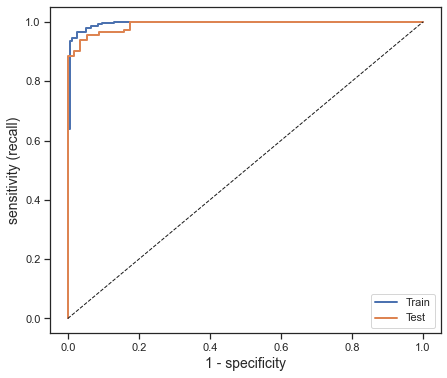

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label="Train", lw=2)
plt.plot(fpr_test, tpr_test, label="Test", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.ylabel("sensitivity (recall)", fontsize=14)
plt.xlabel("1 - specificity", fontsize=14)
plt.legend(); plt.show()

Но как происходит оптимизация параметров модели? В ошибке, которую мы наблюдали выше, было указано, что сходимость не была достигнута.

Чтобы понять, как происходит оптимизация параметров (a.k.a. "подгон"), нужно разобраться с двумя дополнительными вещами.

## Функция потерь, градиентный спуск

При "подгоне" (fitting) самой модели происходит приблизительно следующее:

![training_gif.gif](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/training_gif.gif)

Сама модель на картинке описывается формулой: $y = a + b \cdot x$

Ее параметры итеративно меняются от $a = 0, b = 0$ до $ a \approx 1, b \approx 2.2$

Каким образом оптимизатор (компьютер) узнает, в какую сторону ему нужно изменять параметры?

### Функция потерь (функция ошибки, loss function)

Для того, чтобы все это уметь, на каждом шаге (итерации) оптимизатору необходимо понимать, насколько сильно модель ошибается (т.е. насколько ее предсказания отличаются от значений тренировочной выборки).

В качестве функции ошибки для линейной регрессии можно использовать метрику качества MSE или MAE.

**Для любопытных**: На самом деле, можно использовать любую другую метрику, значение которой тем меньше, чем параметры модели ближе к оптимальному описанию данных. И оптимизация модели будет работать, но, возможно, не так хорошо.

**Для любопытных**: MSE и MAE гарантированно являются наилучшими из возможных функций потерь (для линейной регрессии, по методу максимального правдоподобия), если случайная шумовая компонента ($\epsilon$) распределена нормально (MSE) или по Лапласу (MAE).

![training_gif_2.gif](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/training_gif_2.gif)

Как мы видим, для получения хороших параметров нужна **минимизация функции потерь**. Обратим внимание: при оптимизании нам важно, что **функция ошибки зависит от параметров модели** (коэффициентов), которые мы можем изменять; данные же остаются фиксированными (в простом случае).

Чтобы понять, в какую сторону нужно менять параметры, используется **подсчет градиента функции ошибки**.

**Что такое градиент?**

Простыми словами, градиент - это вектор ($\nabla$), направленный в сторону наиболее быстрого роста функции. Соответственно, направление ($-\nabla$) соответствует направлению максимального уменьшения функции.

**Для любопытных**: Градиент - это **набор частных производных** целевой функции. Для нас важно то, что **направление вектора градиента ($\nabla$) совпадает с направлением максимального роста функции**.

Соответственно, оптимизация градиентным спуском - это изменение параметров модели в сторону, противоположную градиенту функции ошибок.

![gradient_desc.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/gradient_desc.png)

## Заключение

### TL;DR

* **Обучение** для модели - это **итеративное улучшение описания данных** моделью с помощью изменения ее параметров.

* В обучении с учителем есть 2 основные задачи: **задача классификации и задача регрессии**

* Самые простые **модели для задачи классификации** - это **k-NN и логистическая регрессия**

* Самые простые **модели для задачи регрессии** - это **k-NN и линейная регрессия**

### TL;DR

* Модель может **переобучиться**, т.е. **выучить не только закономерности** в данных, **но и шум**. Чтобы ловить такие ошибки, исходную выборку **разбивают на 2 части (train и test)**. Train используют для обучения модели, а test - для проверки качества.

* Для оценки качества используют много метрик. Важно знать:
  * Для задачи классификации: **accuracy, F1, AUC ROC**
  * Для задачи регрессии: **MSE, MAE**

* Оптимизация параметров модели (если их нужно оптимизировать) чаще всего осуществляется с помощью **градиентного спуска по функции ошибок**.

# Вот и все!

## Дальше семинар